In [ ]:
!gsutil ls gs://zapbench-release/volumes/20240930/

In [ ]:
!pip install tensorstore

E0514 18:15:19.264811 163525514 google_auth_provider.cc:188] Could not find the credentials file in the standard gcloud location [/Users/ayaam/.config/gcloud/application_default_credentials.json]. You may specify a credentials file using $GOOGLE_APPLICATION_CREDENTIALS, or to use Google application default credentials, run: gcloud auth application-default login


Schema({
  'chunk_layout': {
    'grid_origin': [0, 0, 0, 0],
    'inner_order': [3, 2, 1, 0],
    'read_chunk': {'shape': [512, 512, 1, 1]},
    'write_chunk': {'shape': [512, 512, 1, 1]},
  },
  'codec': {
    'codecs': [
      {'configuration': {'order': [3, 2, 1, 0]}, 'name': 'transpose'},
      {'configuration': {'endian': 'little'}, 'name': 'bytes'},
      {
        'configuration': {
          'blocksize': 0,
          'clevel': 4,
          'cname': 'zstd',
          'shuffle': 'shuffle',
          'typesize': 2,
        },
        'name': 'blosc',
      },
    ],
    'driver': 'zarr3',
  },
  'dimension_units': [
    [406.0, 'nm'],
    [406.0, 'nm'],
    [4000.0, 'nm'],
    [0.9141, 's'],
  ],
  'domain': {
    'exclusive_max': [[2048], [1328], [72], [7879]],
    'inclusive_min': [0, 0, 0, 0],
    'labels': ['x', 'y', 'z', 't'],
  },
  'dtype': 'uint16',
  'fill_value': 0,
  'rank': 4,
})


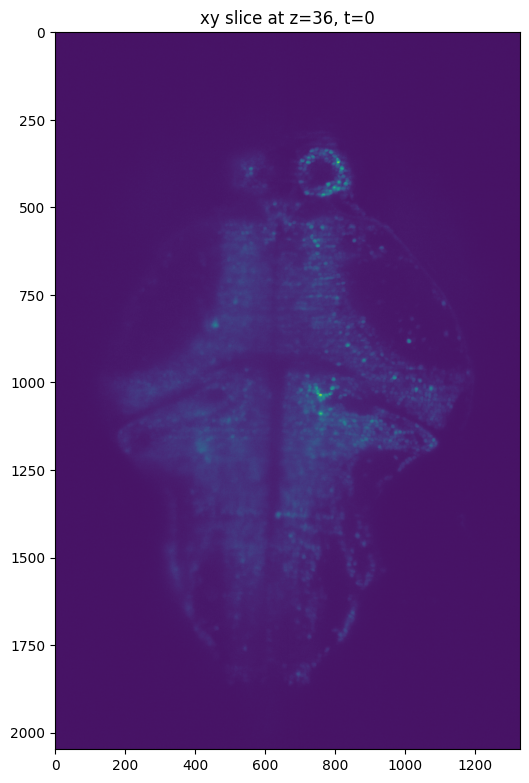

In [3]:
import matplotlib.pyplot as plt
import tensorstore as ts


# Create handle to the remote dataset.
ds = ts.open({
    'open': True,
    # Datasets are generally stored in zarr v3 format ('zarr3').
    # There are a few exceptions, where v2 is used ('zarr').
    'driver': 'zarr3',
    # Path of the dataset we want to load.
    'kvstore': 'gs://zapbench-release/volumes/20240930/raw'
}).result()

# Display info about the dataset.
print(ds.schema)

# Fetch a xy-slice using the handle.
z, t = 36, 0
example_xy_slice = ds[:, :, z, t].read().result()

# Plot slice.
plt.figure(figsize=(6, 12))
plt.imshow(example_xy_slice)
plt.title(f'xy slice at {z=}, {t=}');

In [ ]:
# Create handle to the remote dataset.
ds_traces = ts.open({
    'open': True,
    'driver': 'zarr3',
    'kvstore': 'gs://zapbench-release/volumes/20240930/traces'
}).result()

ds_traces.schema

In [ ]:
!pip install git+https://github.com/google-research/zapbench.git#egg=zapbench

In [ ]:
from zapbench import constants
from zapbench import data_utils

# Print the indexing bounds per condition.
# Note that we keep a minimal amount of "padding" between conditions.
for condition_id, condition_name in enumerate(constants.CONDITION_NAMES):
  inclusive_min, exclusive_max = data_utils.get_condition_bounds(condition_id)
  print(f'{condition_name} has bounds [{inclusive_min}, {exclusive_max}).')

In [ ]:
traces_turning = ds_traces[3736:5046, :].read().result()


In [ ]:
traces_turning.shape

In [ ]:
traces_turning[0].shape

In [ ]:
traces_turning.T.shape

In [ ]:
fig = plt.figure(figsize=(12, 12))
plt.title(f'traces for')
im = plt.imshow(traces_turning.T, aspect="auto")
plt.xlabel('timestep')
plt.ylabel('neuron')
cbar = fig.colorbar(im)
cbar.set_label("normalized activity (df/f)")
plt.show();


In [7]:
space_ds = ts.open({
    'open': True,
    'driver': 'zarr',
    'kvstore': "gs://zapbench-release/volumes/20240930/position_embedding/"

}).result()

In [8]:
space_ds.schema #192 numbers describing each neuron??

Schema({
  'chunk_layout': {
    'grid_origin': [0, 0],
    'inner_order': [0, 1],
    'read_chunk': {'shape': [1, 192]},
    'write_chunk': {'shape': [1, 192]},
  },
  'codec': {
    'compressor': {
      'blocksize': 0,
      'clevel': 5,
      'cname': 'zstd',
      'id': 'blosc',
      'shuffle': 2,
    },
    'driver': 'zarr',
    'filters': None,
  },
  'domain': {'exclusive_max': [[71721], [192]], 'inclusive_min': [0, 0]},
  'dtype': 'float32',
  'rank': 2,
})

In [20]:
space_ds[:5, :5].read().result()

array([[ 0.9984801 , -0.92961186, -0.56579775,  0.44003677, -0.87605745],
       [-0.5798788 ,  0.47044313, -0.3601191 ,  0.8710497 ,  0.29201156],
       [-0.28706637,  0.244422  , -0.453398  , -0.9066556 , -0.30345914],
       [ 0.217082  , -0.9910996 ,  0.44211057,  0.42382416,  0.90684265],
       [ 0.9951768 , -0.8773685 ,  0.7434171 , -0.5841904 ,  0.61007655]],
      dtype=float32)